In [12]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

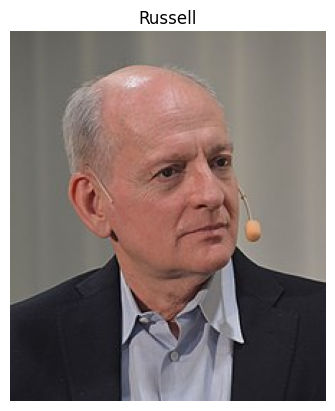

In [13]:
def show_image(img_path, title="Image"):
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not load image {img_path}")
        return
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

# 1. Vizualizare o imagine specifică
image_path = "images/Russell.jpg"
show_image(image_path, "Russell")

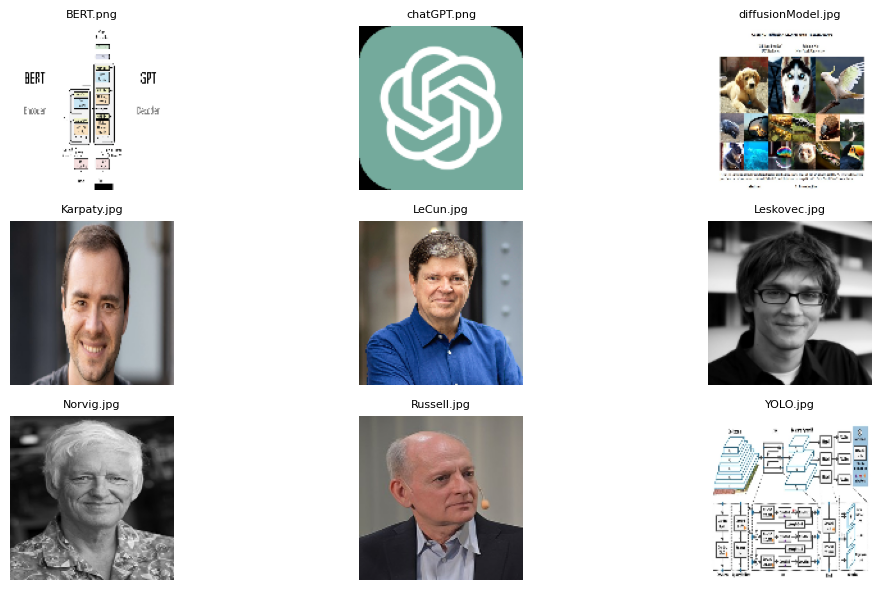

In [14]:
image_files = [f for f in os.listdir('images') if f.endswith((".jpg", ".png", ".jpeg"))]
images = []
filenames = []

#Redimensionarea imaginilor
for filename in image_files:
    img_path = os.path.join('images', filename)
    img = cv2.imread(img_path)
    if img is not None:
        resized_img = cv2.resize(img, (128, 128))  # Redimensionare
        images.append(resized_img)
        filenames.append(filename)

# Afișare imagini într-o grilă
rows = 3 
cols = min(len(images), 3)  # Numărul de coloane

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
axes = axes.ravel()

for i in range(len(images)):
    img_rgb = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    axes[i].imshow(img_rgb)
    axes[i].set_title(filenames[i], fontsize=8)
    axes[i].axis("off")

plt.tight_layout()
plt.show()




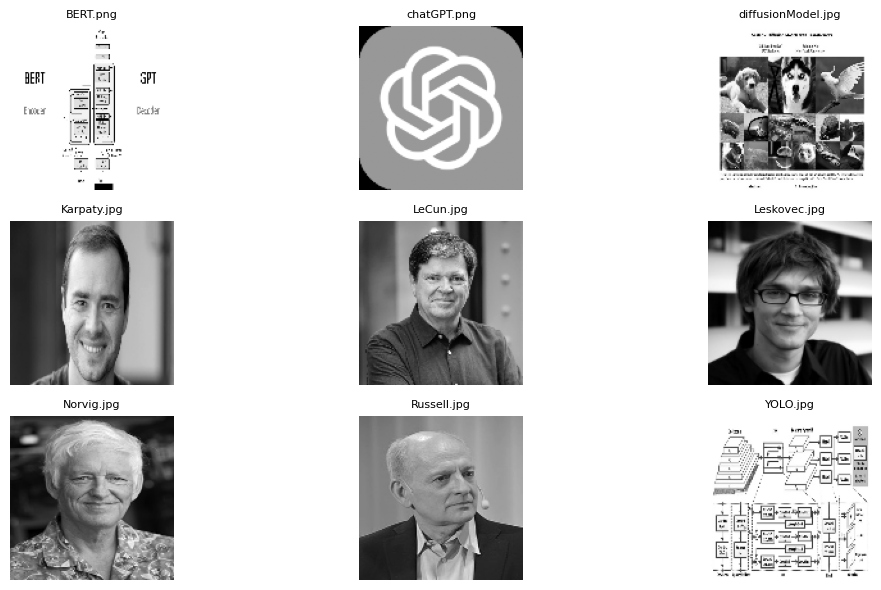

In [15]:
gray_images = []

for img in images:  # `images` conține imaginile deja redimensionate
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convertire la grayscale
    gray_images.append(gray_img)
    
# Afișare imagini grayscale într-o grilă
fig, axes = plt.subplots(3, min(len(gray_images), 3), figsize=(12, 6))
axes = axes.ravel()

for i in range(len(gray_images)):
    axes[i].imshow(gray_images[i], cmap="gray")  # Afișăm cu colormap "gray"
    axes[i].set_title(filenames[i], fontsize=8)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

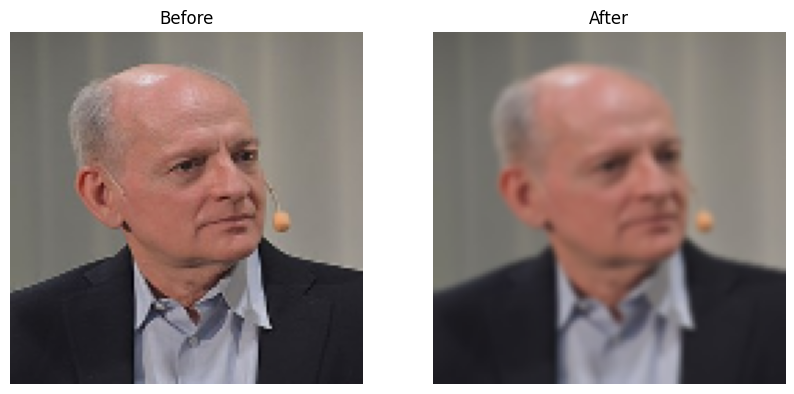

In [16]:
img_to_blur = images[7]

# Aplicare Gaussian Blur
blurred_img = cv2.GaussianBlur(img_to_blur, (5, 5), 0)

# Afișare before-after
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv2.cvtColor(img_to_blur, cv2.COLOR_BGR2RGB))
ax[0].set_title("Before")
ax[0].axis("off")

ax[1].imshow(cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB))
ax[1].set_title("After")
ax[1].axis("off")

plt.show()

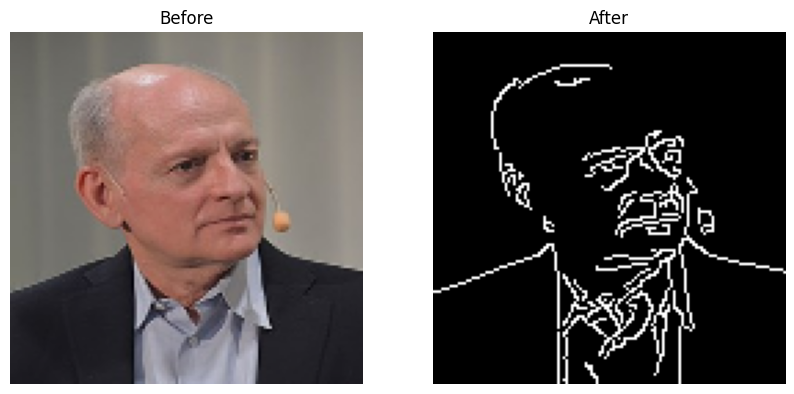

In [17]:
img_to_edge = images[7]

# Convertim imaginea la grayscale înainte de detecția marginilor
gray_img = cv2.cvtColor(img_to_edge, cv2.COLOR_BGR2GRAY)

# Aplicăm operatorul Canny pentru detectarea muchiilor
edges_img = cv2.Canny(gray_img, 100, 200)

# Afișare before-after
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv2.cvtColor(img_to_edge, cv2.COLOR_BGR2RGB))
ax[0].set_title("Before")
ax[0].axis("off")

ax[1].imshow(edges_img, cmap="gray")
ax[1].set_title("After")
ax[1].axis("off")

plt.show()

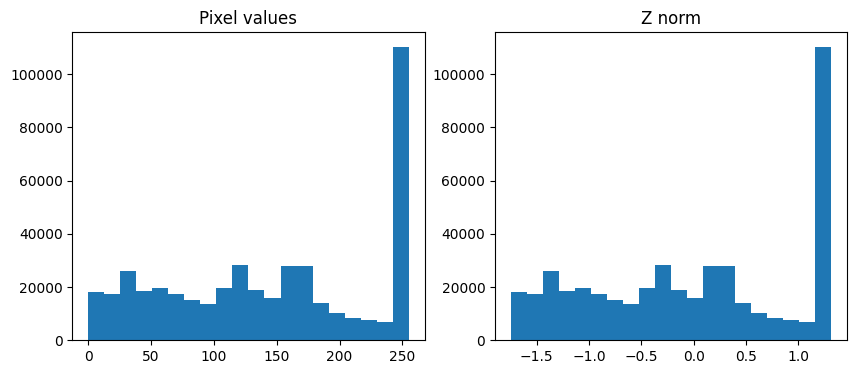

In [18]:
flattened_pixel_matrices = []
zscore_normalized_pixel_matrices = []

for img in images:
    flattened_pixel_matrices.extend(np.array(img).flatten())

# Calculează media și abaterea standard a valorilor pixelilor
mean_pixel = np.mean(flattened_pixel_matrices)
std_pixel = np.std(flattened_pixel_matrices)

# Aplică normalizarea Z-score
for pixel in flattened_pixel_matrices:
    zscore_normalized_pixel_matrices.append((pixel - mean_pixel) / std_pixel)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.hist(flattened_pixel_matrices, 20)
ax1.set_title('Pixel values')
ax2.hist(zscore_normalized_pixel_matrices, 20)
ax2.set_title('Z norm')
plt.show()

